### Решение задачи Бюффона:
 - Иголку длиной L мм наудачу бросают на разлинованную бумагу, где расстояние между соседними линиями = A мм.
 - С какой вероятностью упавшая иголка пересечет линию бумаги?

In [241]:
import numpy as np
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,arcsin,cos,arccos,tan,sqrt,exp)
import matplotlib.pyplot as plt
import math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [242]:
A = 100 # Расстояние между линиями
L = 40 # Длина иглы

Проверим работу зависимостей на одном броске с заданными параметрами

(-100, 100)

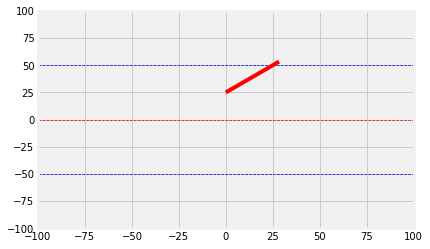

In [243]:
C = A/4 # Изначальное расстояние от начала иглы до линии (-a/2 ... a/2) 
angle = pi/4 # Угол поворота иглы (0 ... pi) 

x1 = 0
x2 = L*cos(angle)
y1 = C
y2 = L*sin(angle)+y1

plt.plot([-A,2*A],[A/2,A/2], color ='blue', linewidth=0.75, linestyle ="--")
plt.plot([-A,2*A],[0,0], color ='red', linewidth=0.75, linestyle ="--")
plt.plot([-A,2*A],[-A/2,-A/2], color ='blue', linewidth=0.75, linestyle ="--") 
plt.plot([x1,x2],[y1,y2], 'r')
plt.ylim(-A,A)
plt.xlim(-A,A)

Параметры броска:

In [244]:
print(f'x2-x1: {x2-x1}') # X
print(f'y2-y1: {y2-y1}') # Y
print(f'R: {sqrt((x2-x1)**2+(y2-y1)**2)}') # R
print(f'h: {A/2-y1}')
print(f'L*sin(angle): {L*sin(angle)}')
print(f'h < L*sin(a) ? {A/2-y1<L*sin(angle)}') # Условие срабатывания события (выполнено)

x2-x1: 28.284271247461902
y2-y1: 28.284271247461902
R: 40.0
h: 25.0
L*sin(angle): 28.284271247461902
h < L*sin(a) ? True


Сгенерируем 30 случайных бросков, оценим результат на графике

Произошло 5 пересечений из 30 бросков


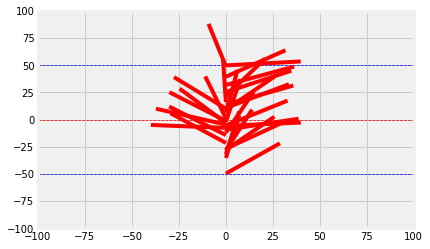

In [245]:
N = 30
C = np.random.uniform(-A/2, A/2, N) # Изначальное расстояние от начала иглы до линии (-a/2 ... a/2) 
angle = np.random.uniform(0, pi, N)
count = 0

def is_crossed(A, L, C, angle):
    
    if A/2-C<L*sin(angle):
        count += 1
    return count

plt.plot([-A,2*A],[A/2,A/2], color ='blue', linewidth=0.75, linestyle ="--")
plt.plot([-A,2*A],[0,0], color ='red', linewidth=0.75, linestyle ="--")
plt.plot([-A,2*A],[-A/2,-A/2], color ='blue', linewidth=0.75, linestyle ="--") 
plt.ylim(-A,A)
plt.xlim(-A,A)

for i in range(N):
    x1 = 0
    x2 = L*cos(angle)[i]
    y1 = C[i]
    y2 = L*sin(angle)[i]+y1
    # is_crossed(A,L,C[i],angle[i])
    if A/2-C[i]<L*sin(angle)[i]:
        count += 1
    plt.plot([x1,x2],[y1,y2], 'r')
    
print(f'Произошло {count} пересечений из {N} бросков')
plt.show()

Все случаи пересечения располагаются в области под графиком синусоиды. 

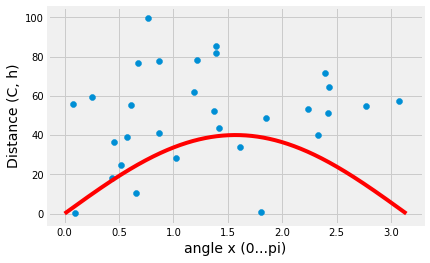

In [246]:
# A = 100 , L = 40
x = linspace(0,pi,1000)
plt.plot(x,L*sin(x), 'r') # L*sin(angle) = C
plt.scatter(angle,A/2-C) # A/2-C = h
plt.xlabel('angle x (0...pi)',fontsize=14)
plt.ylabel('Distance (C, h)',fontsize=14)
plt.show()

Вероятность того, что иголка пересечет нить, будет равна отношению площади фигуры под графиком к площади прямоугольника.

Теперь сгенерируем 100 000 бросков и проанализируем параметры

In [233]:
A = 100 # Расстояние между линиями
L = 100 # Длина иглы

N = 100000
C = np.random.uniform(-A/2, A/2, N) # Изначальное расстояние от начала иглы до линии (-a/2 ... a/2) 
angle = np.random.uniform(0, pi, N)
count = 0
cn = []
nn = []
yy = []

for i in range(N):
    x1 = 0
    x2 = L*cos(angle)[i]
    y1 = C[i]
    y2 = L*sin(angle)[i]+y1
    if A/2-C[i]<L*sin(angle)[i]:
        count += 1
    nn.append(i+1)
    cn.append(count/(i+1))
    yy.append(y2)


% событий стремится к определенному значению, которое зависит от длины иглы `L` и расстояния между линиями `A` (A = 100, L = 40, Вероятность P стремится к ~0.25)

При A = 100, L = 100, Вероятность P стремится к ~0.637, или $\frac{2}{\pi}$

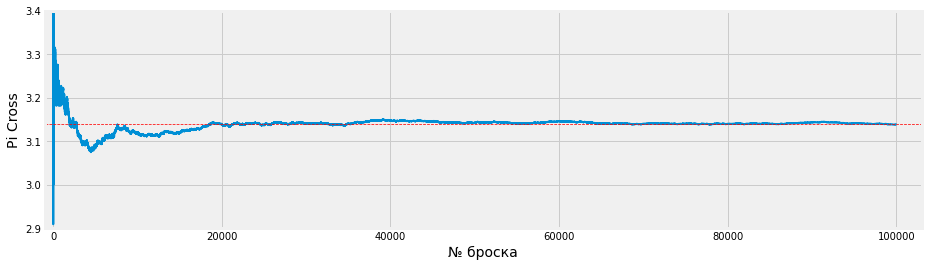

Произошло 63719 пересечений из 100000 бросков
Среднее ожидание для последних 50000.0 событий: 0.6366374351638979
Pi Cross = 3.1415064957284873


In [235]:
cn_pi = np.divide(2,cn)
plt.figure(figsize=(14,4))
plt.plot(nn,cn_pi,linewidth=2)
plt.plot([N-N*1.01,N*1.03],[cn_pi[N-1],cn_pi[N-1]], color ='red', linewidth=0.75, linestyle ="--")

P = cn_pi[int(N/2):]

plt.xlabel('№ броска',fontsize=14)
plt.ylabel('Pi Cross',fontsize=14)
plt.ylim(2.9,3.4)
plt.xlim(N-N*1.01,N*1.03)
plt.show()    
print(f'Произошло {count} пересечений из {N} бросков')
print(f'Среднее ожидание для последних {N/2} событий: {np.mean(cn[int(N/2):])}')
print(f'Pi Cross = {np.mean(P)}')

Гистограмма  распределения расстояния от кончика иглы до ближайшей линии (при случайном угле бросания):

mu = 33.7123064025261, D = 566.1974445251878, std = 23.79490375112259


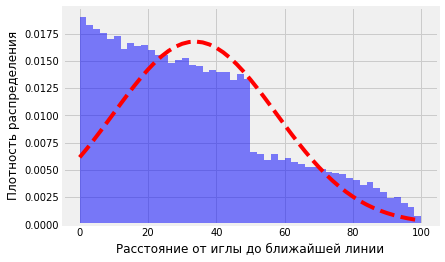

In [236]:
# A = 100, L = 100
# yy - координата кончика иглы c учетом угла поворота (y2) = L*sin(angle)+y1

dist_1 = np.abs(np.subtract(np.abs(A/2), np.abs(yy))) # Абсолютное расстояние от кончика до ближайшей линии
# dist_1 = np.subtract(np.abs(A/2), np.abs(yy))

num_bins = 50
n, bins, patches = plt.hist(dist_1, num_bins, density=1, facecolor='b', alpha=0.5)

plt.xlabel('Расстояние от иглы до ближайшей линии')
plt.ylabel('Плотность распределения')

mu = np.mean(dist_1) # Среднее
D = np.var(dist_1) # Дисперсия
std = np.std(dist_1) # Среднеквадратичное отклонение
print(f'mu = {mu}, D = {D}, std = {std}')
y = mlab.normpdf(bins, mu, std)
plt.plot(bins, y, 'r--')

plt.show()

## Зависимость вероятности от начальных условий

In [238]:
def func(L, A, N=1000):
    C = np.random.uniform(-A/2, A/2, N) # Изначальное расстояние от начала иглы до линии (-a/2 ... a/2) 
    angle = np.random.uniform(0, pi/2, N)
    count = 0
    cn = []
    nn = []

    for i in range(N):
        x1 = 0
        x2 = L*cos(angle)[i]
        y1 = C[i]
        y2 = L*sin(angle)[i]+y1
        if A/2-C[i]<L*sin(angle)[i]:
            count += 1
        nn.append(i+1)
        cn.append(count/(i+1))
    P = cn[int(N/2):]
    return P

In [239]:
needle_len_min = 40
needle_len_max = 80
lines_min = 40
lines_max = 160
needle_len = []
line_width = []
P = []

for i in range (needle_len_min, needle_len_max, 10):
    for j in range (lines_min, lines_max, 10):
        needle_len.append(i)
        line_width.append(j)
        P.append(np.mean(func(i, j)))
df = pd.DataFrame(needle_len, columns=['Длина иглы (L)'])
df['Расстояние между линиями (A)'], df['Вероятность (P)'] = line_width, P
df

,Длина иглы (L),Расстояние между линиями (A),Вероятность (P)
0,40,40,0.622554
1,40,50,0.544626
2,40,60,0.430251
3,40,70,0.346651
4,40,80,0.323327
5,40,90,0.249817
6,40,100,0.243603
7,40,110,0.231423
8,40,120,0.192077
9,40,130,0.212575


# $\pi$ 

In [18]:
import string as str
s = 'Это я знаю и помню прекрасно, пи многие знаки мне лишни, напрасны'
s = s.replace(',', "")
b = s.split(' ')
for i in range(len(b)):
    print(len(b[i]),end = '')
    if i==0:
        print('.',end = '')

3.14159265358